# Data Mining Project: Weather Analysis

### Combining the datasets

In [50]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder
import pickle

In [51]:
df1 = pd.read_csv('202501_CombinedData.csv')
df2 = pd.read_csv('202502_CombinedData.csv')
df3 = pd.read_csv('202503_CombinedData.csv')
df4 = pd.read_csv('202504_CombinedData.csv')

df = pd.concat([df1, df2, df3, df4], ignore_index=True)

df.to_csv('combined_weather.csv', index=False)

In [52]:
df = pd.read_csv('combined_weather.csv')
print(df.info())
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284961 entries, 0 to 284960
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   visibility           284772 non-null  float64
 1   datetime             284961 non-null  object 
 2   main.temp            284961 non-null  float64
 3   main.feels_like      284961 non-null  float64
 4   main.temp_min        284961 non-null  float64
 5   main.temp_max        284961 non-null  float64
 6   main.pressure        284961 non-null  float64
 7   main.humidity        284961 non-null  float64
 8   main.sea_level       284961 non-null  float64
 9   main.grnd_level      284961 non-null  float64
 10  wind.speed           284961 non-null  float64
 11  wind.deg             284961 non-null  float64
 12  wind.gust            245652 non-null  float64
 13  clouds.all           284961 non-null  float64
 14  sys.sunrise          284961 non-null  object 
 15  sys.sunset       

### Filtering for Iloilo City, Removing Unecessary Variables, and Filling rain.1h

In [ ]:
city = 'Iloilo City'
df = df[df['city_name'] == city]
df1 = df.drop(columns=['sys.sunrise', 'sys.sunset', 'main.sea_level', 'main.grnd_level', 'weather.description', 'wind.gust', 'wind.deg', 'city_name'])
df1['rain.1h'] = df1['rain.1h'].fillna(0)
print(df.info())
print(df.shape)

In [ ]:
df1.to_csv('combined_weather_iloilo.csv', index=False)

### Dateset Cleaning Process

In [28]:
df2 = pd.read_csv('combined_weather_iloilo.csv')
print(df2.info())
print(df2.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2050 entries, 0 to 2049
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   visibility       2050 non-null   float64
 1   datetime         2050 non-null   object 
 2   main.temp        2050 non-null   float64
 3   main.feels_like  2050 non-null   float64
 4   main.temp_min    2050 non-null   float64
 5   main.temp_max    2050 non-null   float64
 6   main.pressure    2050 non-null   float64
 7   main.humidity    2050 non-null   float64
 8   wind.speed       2050 non-null   float64
 9   clouds.all       2050 non-null   float64
 10  weather.main     2050 non-null   object 
 11  rain.1h          2050 non-null   float64
dtypes: float64(10), object(2)
memory usage: 192.3+ KB
None
(2050, 12)


In [29]:
df2['datetime'] = pd.to_datetime(df2['datetime'])
df2.set_index('datetime', inplace=True)

Index has been switched to datetime, now there are gonna be a bunch of issues here, namely
- Intervals are not exact, and there are differences in between minutes
- Intervals are also not consistent, From January 1st to February 25, it uses a bi-hourly interval before it transitions to hourly
  - There are also times when it would suddenly switch to hourly 
- There is a massive 5-day gap from March 23 - 28

Now that we have identified that, lets get to cleaning

In [30]:
df2.index = df2.index.round('H')
print(df2.head())
print(df2.shape)

                           visibility  main.temp  main.feels_like  \
datetime                                                            
2025-01-01 00:00:00+08:00     10000.0      24.78            25.64   
2025-01-01 02:00:00+08:00     10000.0      24.70            25.58   
2025-01-01 04:00:00+08:00     10000.0      24.80            25.66   
2025-01-01 06:00:00+08:00     10000.0      24.67            25.54   
2025-01-01 08:00:00+08:00     10000.0      25.95            25.95   

                           main.temp_min  main.temp_max  main.pressure  \
datetime                                                                 
2025-01-01 00:00:00+08:00          24.78          24.78         1010.0   
2025-01-01 02:00:00+08:00          24.70          24.70         1009.0   
2025-01-01 04:00:00+08:00          24.80          24.80         1009.0   
2025-01-01 06:00:00+08:00          24.67          24.67         1009.0   
2025-01-01 08:00:00+08:00          25.95          25.95         1011.0  

Hourly Intervals are rounded up

In [31]:
df2.index.duplicated().sum()


1

Checking for Duplicate Timestamps, thankfully there's only one

In [32]:
df2[df2.index.duplicated(keep=False)]

,visibility,main.temp,main.feels_like,main.temp_min,main.temp_max,main.pressure,main.humidity,wind.speed,clouds.all,weather.main,rain.1h
datetime,,,,,,,,,,,
2025-01-12 14:00:00+08:00,10000.0,27.62,31.3,27.62,27.62,1009.0,81.0,7.4,95.0,Rain,0.12
2025-01-12 14:00:00+08:00,10000.0,27.62,31.3,27.62,27.62,1009.0,81.0,7.4,95.0,Clouds,0.00


In [33]:
df2 = df2[~((df2.index == '2025-01-12 14:00:00+08:00') & (df2['weather.main'] == 'Clouds'))]
df2[df2.index == '2025-01-12 14:00:00']
df2.index.duplicated().sum()

0

Timestamp Check Completed

In [34]:
df2['time_diff'] = df2.index.to_series().diff().dt.total_seconds() / 3600
df2['time_diff'].value_counts()

time_diff
1.0      1348
2.0       699
133.0       1
Name: count, dtype: int64

This checks for the time difference between consecutive rows in hours. Currently, it all checks out, with 1348 Hourly data intervals and 699 bi-hourly intervals. save for a suspicious time difference of 133 Hours, this is the time gap from March 23 - 28 issue. Either way, Random Forest and SVM, particularly as classifiers, are a lot more resilient to time gaps, so this actually works in our favor.

Now let's do one final check 

In [35]:
df2 = df2.drop(columns=['time_diff'])
df2 = df2.reset_index()
print(df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2049 entries, 0 to 2048
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype                    
---  ------           --------------  -----                    
 0   datetime         2049 non-null   datetime64[ns, UTC+08:00]
 1   visibility       2049 non-null   float64                  
 2   main.temp        2049 non-null   float64                  
 3   main.feels_like  2049 non-null   float64                  
 4   main.temp_min    2049 non-null   float64                  
 5   main.temp_max    2049 non-null   float64                  
 6   main.pressure    2049 non-null   float64                  
 7   main.humidity    2049 non-null   float64                  
 8   wind.speed       2049 non-null   float64                  
 9   clouds.all       2049 non-null   float64                  
 10  weather.main     2049 non-null   object                   
 11  rain.1h          2049 non-null   float64                

In [36]:
df2.isnull().sum()

datetime           0
visibility         0
main.temp          0
main.feels_like    0
main.temp_min      0
main.temp_max      0
main.pressure      0
main.humidity      0
wind.speed         0
clouds.all         0
weather.main       0
rain.1h            0
dtype: int64

In [37]:
df2.duplicated().sum()

0

In [38]:
df2 = df2.rename(columns={'main.temp': 'Temperature'})
df2 = df2.rename(columns={'main.feels_like': 'Relative Temperature'})
df2 = df2.rename(columns={'main.temp_min': 'Min Temperature'})
df2 = df2.rename(columns={'main.temp_max': 'Max Temperature'})
df2 = df2.rename(columns={'main.pressure': 'pressure'})
df2 = df2.rename(columns={'main.humidity': 'humidity'})
df2 = df2.rename(columns={'wind.speed': 'Wind Speed'})
df2 = df2.rename(columns={'clouds.all': 'Cloudiness'})
df2 = df2.rename(columns={'weather.main': 'weather'})
df2 = df2.rename(columns={'rain.1h': 'Rainfall'})

In [39]:
print(df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2049 entries, 0 to 2048
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype                    
---  ------                --------------  -----                    
 0   datetime              2049 non-null   datetime64[ns, UTC+08:00]
 1   visibility            2049 non-null   float64                  
 2   Temperature           2049 non-null   float64                  
 3   Relative Temperature  2049 non-null   float64                  
 4   Min Temperature       2049 non-null   float64                  
 5   Max Temperature       2049 non-null   float64                  
 6   pressure              2049 non-null   float64                  
 7   humidity              2049 non-null   float64                  
 8   Wind Speed            2049 non-null   float64                  
 9   Cloudiness            2049 non-null   float64                  
 10  weather               2049 non-null   object                

Alright, now let's save this as our data mining dataset for analysis

In [40]:
df2.to_csv('dataset_final.csv', index=False)

### Feature Extraction and Encoding

In [42]:
df2['datetime'] = pd.to_datetime(df2['datetime'])
df2.set_index('datetime', inplace=True)
df2['hour'] = df2.index.hour
df2['day'] = df2.index.day
df2['weekday'] = df2.index.weekday  # 0 = Monday, 6 = Sunday
df2['month'] = df2.index.month
df2['is_weekend'] = df2['weekday'].isin([5, 6])  # Saturday or Sunday
df2['is_night'] = df2['hour'].isin(list(range(0, 6)) + list(range(20, 24)))  # 8PM to 6AM

In [43]:
print(df2.info())
print(df2.shape)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2049 entries, 2025-01-01 00:00:00+08:00 to 2025-04-30 23:00:00+08:00
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   visibility            2049 non-null   float64
 1   Temperature           2049 non-null   float64
 2   Relative Temperature  2049 non-null   float64
 3   Min Temperature       2049 non-null   float64
 4   Max Temperature       2049 non-null   float64
 5   pressure              2049 non-null   float64
 6   humidity              2049 non-null   float64
 7   Wind Speed            2049 non-null   float64
 8   Cloudiness            2049 non-null   float64
 9   weather               2049 non-null   object 
 10  Rainfall              2049 non-null   float64
 11  hour                  2049 non-null   int32  
 12  day                   2049 non-null   int32  
 13  weekday               2049 non-null   int32  
 14  month                 20

Okay, that's feature extraction done. now let's do some final checks

In [44]:
df2.isnull().sum()

visibility              0
Temperature             0
Relative Temperature    0
Min Temperature         0
Max Temperature         0
pressure                0
humidity                0
Wind Speed              0
Cloudiness              0
weather                 0
Rainfall                0
hour                    0
day                     0
weekday                 0
month                   0
is_weekend              0
is_night                0
dtype: int64

Okay no null values, that's good, now let's check for Value Counts on the weather

In [45]:
df2['weather'].value_counts()


weather
Clouds    1903
Rain        93
Clear       53
Name: count, dtype: int64

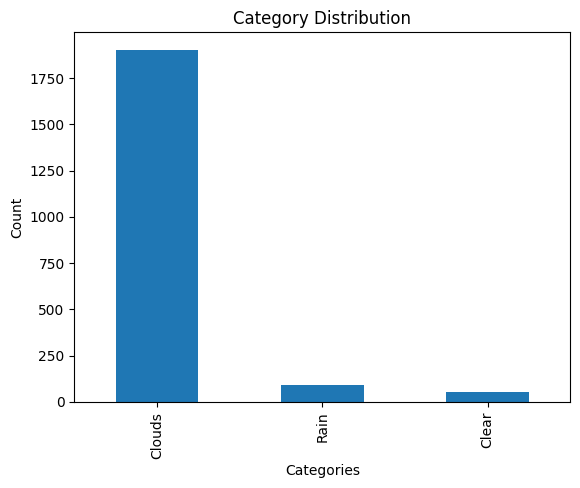

In [46]:
df2['weather'].value_counts().plot(kind='bar')
plt.title('Category Distribution')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.show()

Okay, so there we go, we have a major imbalance but we'll deal with that later. For now let's encode that via label encoding given that it's our target variable and not a feature

In [47]:
le = LabelEncoder()
df2['weather_label'] = le.fit_transform(df2['weather'])
with open('label_encoder.pkl', 'wb') as f:
    pickle.dump(le, f)

In [48]:
print(df2.info())
print(df2.head())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2049 entries, 2025-01-01 00:00:00+08:00 to 2025-04-30 23:00:00+08:00
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   visibility            2049 non-null   float64
 1   Temperature           2049 non-null   float64
 2   Relative Temperature  2049 non-null   float64
 3   Min Temperature       2049 non-null   float64
 4   Max Temperature       2049 non-null   float64
 5   pressure              2049 non-null   float64
 6   humidity              2049 non-null   float64
 7   Wind Speed            2049 non-null   float64
 8   Cloudiness            2049 non-null   float64
 9   weather               2049 non-null   object 
 10  Rainfall              2049 non-null   float64
 11  hour                  2049 non-null   int32  
 12  day                   2049 non-null   int32  
 13  weekday               2049 non-null   int32  
 14  month                 20

In [49]:
df2.to_csv('dataset_final_training.csv', index=False)

That should be our finalized dataset, training on the models will now begin